In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score

import keras.backend as K
if len(K.tensorflow_backend._get_available_gpus()) > 0:
    from keras.layers import CuDNNLSTM as LSTM
    from keras.layers import CuDNNGRU as GRU



Using TensorFlow backend.


In [2]:
# some configuration
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 50
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 5



In [3]:
# load in pre-trained word vectors
print('Loading word vectors...')
word2vec = {}
with open(os.path.join('./large_files/glove.6B/glove.6B.%sd.txt' % EMBEDDING_DIM)) as f:
    count = 0
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec
        count += 1
        
        if count > 2000:
            break
print('Found %s word vectors.' % len(word2vec))


Loading word vectors...
Found 2001 word vectors.


In [4]:
# prepare text samples and their labels
print('Loading in comments...')

train = pd.read_csv("./large_files/jigsaw-toxic-comment-classification-challenge/train.csv",nrows = 200)
sentences = train["comment_text"].fillna("DUMMY_VALUE").values
possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
targets = train[possible_labels].values


Loading in comments...


In [5]:
# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)



# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))


# pad sequences so that we get a N x T matrix
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data.shape)

Found 3768 unique tokens.
Shape of data tensor: (200, 100)


In [7]:
for word, i in word2idx.items():
    print(word,i)

m² 2831
engineering 2692
regions 1917
representatives 3407
qoute 2336
resulted 2668
mom 2001
and 6
ɾ 2878
expertise 1585
colour 1546
face 2463
original 1066
delay 1558
homie 1692
caculator 1695
kalttari 2484
individuals 3721
period 208
student 2177
overweight 2217
broke 3132
understood 1204
southern 1892
free 256
acctually 1708
friend 3192
minerals 2681
irrefutable 2397
eugenics 1586
hurdle 2408
motiejus 3399
credentials 1759
ɫ 2880
recognize 739
₫ 2804
ⁿ 2925
kathleen 1763
suffer 2219
claiming 1433
aroused 2266
except 1111
graph 3668
g 3382
question 626
pop 1701
contribs 840
weight 3146
malayalam 2479
machine 2014
loves 2171
trained 3281
sticks 2973
promoter 2085
anyone 222
conduct 3484
generally 402
todsy 2515
least 3499
misread 2108
able 491
voice 1151
matched 2020
removal 1435
qualifies 1919
further 383
brute 1130
commentator 2758
todo 3025
awful 2249
ass 970
beyond 1091
jayjg 1819
core 2388
job 1042
nist 3030
ɴ 2871
witzewoman 2943
formatting 820
čiurlionienė 3396
introducing 890


insulting 2319
john 625
entran 3688
precise 1187
wp 86
bloodofox 3228
snowflakes 1720
researchers 646
source 463
undeletion 2154
believe 189
would 51
d 3640
impact 2534
commercial 1003
alien 2289
flu 3061
sit 2194
fossilization 2663
ð 1310
ǂ 2898
create 1609
throwing 851
questioning 1789
∞ 2792
d̪ 2845
മെട്രോ 2491
atleast 2428
civility 1664
perfection 1736
150 3481
eat 1045
problems 425
₪ 2822
spiritually 3002
attack 1040
20th 1424
plays 2402
im 1740
canyon 3107
magnitude 3033
older 1688
homosexual 2263
0cdyq6aewaq 2719
fine 939
cannot 3447
ejaculating 2233
transliteration 2476
performance 2725
http 176
ï 1239
alone 330
douche 2193
bio 3767
bridges 3616
blue 2391
illustrates 1779
jurists 1752
ľ 1265
39 1910
tag 217
ǘ 2835
swearing 3604
ɐ 2916
aussies 3738
includes 649
hahahaha 2736
122 2002
šimonis 3389
whole 2700
nationality 335
person 325
traditional 1476
fixed 3664
towers 3032
election 1207
address 1084
another 1041
elusive 2937
material 785
gibberish 2314
embarassingly 2980
cause 5

eighteen 2213
describing 3263
ṇ 1300
cef2e0 3438
russia 2153
faith 410
dropped 3487
assortment 2669
ħ 1309
121 2597
designer 2423
consisted 1907
virtual 2524
looks 428
giant's 1931
m122 1888
tagging 1939
administrative 2036
eastern 2274
opposite 2267
'juvenile' 2469
ɽ 2879
questioned 2665
poets 1485
nature 3052
tandem 3458
once 381
retired 1541
storastas 3391
ģ 1251
70 1925
ml 2488
14 1411
pat 1505
unblocked 3318
straightest 3517
leno 2248
century 779
typically 1189
fictional 2200
mythology 2389
february 1676
ũ 1248
infantry 3563
irc 805
prove 536
ÿ 1242
messier 3764
imo 1846
mrsc 3157
inappropriate 2472
found 499
airplane 2142
misleading 3683
violate 2260
physics 2328
away 2522
banned 1573
won 3288
designed 1088
«» 2796
behavior 601
4000 2684
forced 720
interchange 3378
hastol 420
''this 3647
justices 1747
whats 2346
section 244
reports 1074
mykolaitis 3410
sure 193
187 2303
leves 3660
beware 1990
messy 1583
diggs 1845
falls 657
absurd 930
drastically 2126
https 2487
ğ 1282
☎☓ 3201
bo

kindly 2254
saddens 3256
generations 1395
reamins 2666
obvious 2444
express 2363
assistance 3216
becomes 1758
ή 1318
arabization 2275
status 465
ˡ 2926
assumed 2031
conflict 682
criticism 2005
moonlite 2537
care 819
list 136
highly 3699
lower 1871
google 2706
process 644
went 728
characters 764
thousands 3512
barnstar 638
rocks 3691
nyt 3429
dick 543
mainspace 2322
antonin 1770
untagged 1624
agree 409
differences 1851
sister's 2225
seek 2330
journalists 3017
secession 3124
wide 3353
day 178
48 1627
lightblue 3644
can 36
ō 1276
ɚ 2909
virus 2374
code 3483
intelligent 1089
crap 1518
hating 2565
â 1225
mentions 903
explaining 1941
term 204
both 414
related 2286
journal 1194
ɲ 2869
pile 3690
n00b 3113
colleague 3235
urgent 3701
introduction 2504
2007 400
grab 2236
you 5
reverting 3433
ʊ 2905
collaboration 3153
newspaper 3093
raised 2380
yeah 877
expansion 3064
pd 3303
deepest 3516
facility 2107
improbable 2410
harass 1434
head 404
don't 40
discussed 3489
during 1193
womb' 2226
release 1620

speak 722
irish 733
administrator 1457
tidy 2769
horrible 3603
counties 3176
belated 2359
ɵ 2907
anywhere 2576
support 894
nasals 3737
fascinating 2521
reformers 3405
caused 3610
qualify 2415
inclusion 1081
29 574
apart 1455
skinhead 1977
x 2715
theories 2398
reasoning 1461
managed 1774
winning 3118
christians 719
band 660
guy 818
translate 1804
crucial 3607
east 431
⅜ 2789
hypothesis 3040
as 15
language 1127
connections 2064
₭ 2811
mixture 3381
just 47
gay 512
proper 596
integrated 2183
apologies 560
moved 732
sandbox 559
italy 2073
movements 523
ŵ 1235
recantation 2012
became 3020
ethnicity 549
argued 3268
researching 1026
heinous 2530
short 832
won't 406
basis 1869
price 3357
reputable 3515
someones 1995
appropriately 3314
sense 258
ť 1270
examples 1161
en 2713
unhelpful 1746
wwi 3408
necessarily 888
jza 1432
ў 1380
works 703
country 422
ideological 3338
entrances 3693
pronounced 2981
δ 1326
thanks 73
ɯ 2902
griffin 2054
formed 2403
he's 790
‘ 2793
marshall 898
precisely 3420
impers

In [6]:
# prepare embedding matrix
print('Filling pre-trained embeddings...')
num_words = min(MAX_VOCAB_SIZE, len(word2idx) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word2idx.items():
    if i < MAX_VOCAB_SIZE:
        embedding_vector = word2vec.get(word)
        if embedding_vector is not None:
            # words not found in embedding index will be all zeros.
            embedding_matrix[i] = embedding_vector

embedding_matrix.shape

Filling pre-trained embeddings...


(3769, 50)

In [8]:
# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(
  num_words,
  EMBEDDING_DIM,
  weights=[embedding_matrix],
  input_length=MAX_SEQUENCE_LENGTH,
  trainable=False
)




In [9]:
print('Building model...')

# create an LSTM network with a single LSTM
input_ = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
# x = LSTM(15, return_sequences=True)(x)
x = Bidirectional(LSTM(15, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
output = Dense(len(possible_labels), activation="sigmoid")(x)

model = Model(input_, output)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data,
  targets,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)


Building model...
Training model...
Train on 160 samples, validate on 40 samples
Epoch 1/5
160/160 [==============================] - 2s 15ms/step - loss: 0.7476 - acc: 0.4073 - val_loss: 0.5689 - val_acc: 0.8792
Epoch 2/5
160/160 [==============================] - 0s 2ms/step - loss: 0.5402 - acc: 0.9240 - val_loss: 0.4414 - val_acc: 0.9500
Epoch 3/5
160/160 [==============================] - 0s 2ms/step - loss: 0.4119 - acc: 0.9594 - val_loss: 0.3488 - val_acc: 0.9500
Epoch 4/5
160/160 [==============================] - 0s 2ms/step - loss: 0.3190 - acc: 0.9594 - val_loss: 0.2841 - val_acc: 0.9500
Epoch 5/5
160/160 [==============================] - 0s 2ms/step - loss: 0.2559 - acc: 0.9594 - val_loss: 0.2412 - val_acc: 0.9500


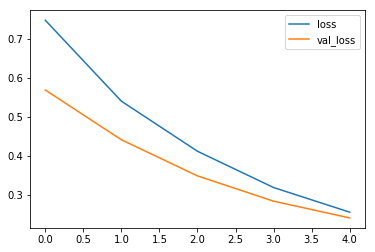

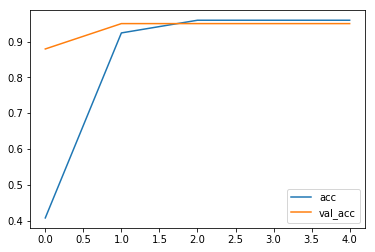

0.5704751570056948


In [10]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

p = model.predict(data)
aucs = []
for j in range(6):
    auc = roc_auc_score(targets[:,j], p[:,j])
    aucs.append(auc)
print(np.mean(aucs))

